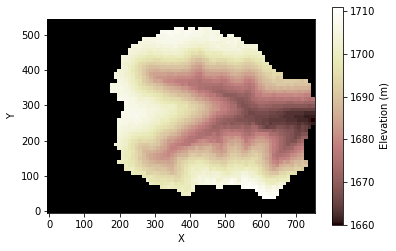

In [17]:
import numpy as np
from landlab import RasterModelGrid, VoronoiDelaunayGrid
from landlab.components import SpatialPrecipitationDistribution
from landlab.io import read_esri_ascii, write_esri_ascii
from landlab import imshow_grid_at_node
from landlab.components import OverlandFlow
import matplotlib.pyplot as plt

# here we use an arbitrary, very small, "real" catchment
fname = '../data/hugo_site.asc'
mg, z = read_esri_ascii(fname, name='topographic__elevation')
mg.status_at_node[mg.nodes_at_right_edge] = mg.BC_NODE_IS_FIXED_VALUE
mg.status_at_node[np.isclose(z, -9999.)] = mg.BC_NODE_IS_CLOSED

plt.figure()
imshow_grid_at_node(mg, z, colorbar_label='Elevation (m)')
plt.show()

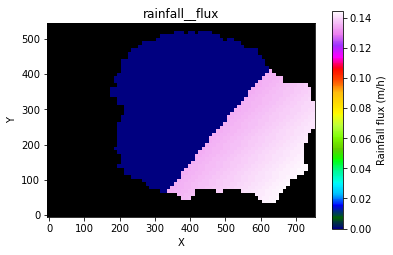

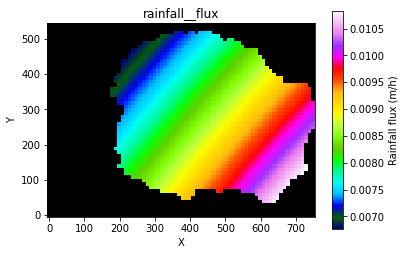

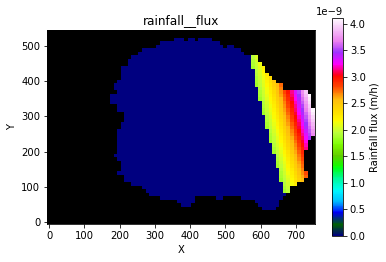

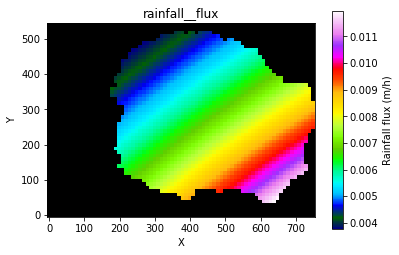

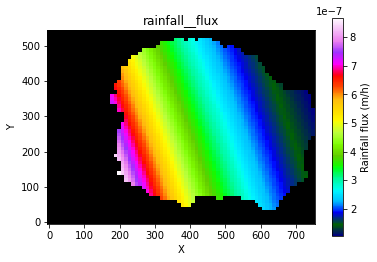

In [21]:
rain = SpatialPrecipitationDistribution(mg,number_of_years = 5)
np.random.seed(26)  # arbitrary to get a cool-looking storm out every tim

# get the storm simulator to provide a storm
# There's only one storm generated here in the time series, so easy enough to do.
# first, check the directory we need for saving exists, and make it if not:
if not os.path.exists('./rainfall_tests'):
    os.makedirs('./rainfall_tests')
i = 0
for (storm_t, interstorm_t) in rain.yield_storms(style='monsoonal'):  # storm lengths in hrs
    i += 1
    mg.at_node['rainfall__flux'] *= 0.001  # because the rainfall comes out in mm/h
    mg.at_node['rainfall__flux'] *= 10.  # to make the storm heavier and more interesting!
    plt.figure()
    # plot up this storm
    imshow_grid_at_node(
        mg, 'rainfall__flux', cmap='gist_ncar', colorbar_label='Rainfall flux (m/h)'
    )
    plt.show()
    write_esri_ascii('./rainfall_tests/rainfall_'+ str(i) + '.asc', mg, 'rainfall__flux', clobber=True)

In [20]:
os.getcwd()

'/home/franz/Documents/work/fluvial/upland'